In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_excel(r"C:\Users\GURU\Downloads\Clustering\Clustering\EastWestAirlines.xlsx",sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
# Display first few rows
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Drop non-numeric columns if necessary
df_numeric = df.select_dtypes(include = [np.number])

In [7]:
# Handle missing values (if any)
df_numeric = df_numeric.dropna()

In [8]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [9]:
# ==============================
# K-MEANS CLUSTERING
# ==============================

In [10]:
# Find the optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range :
    kmeans = KMeans(n_clusters =k, random_state= 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

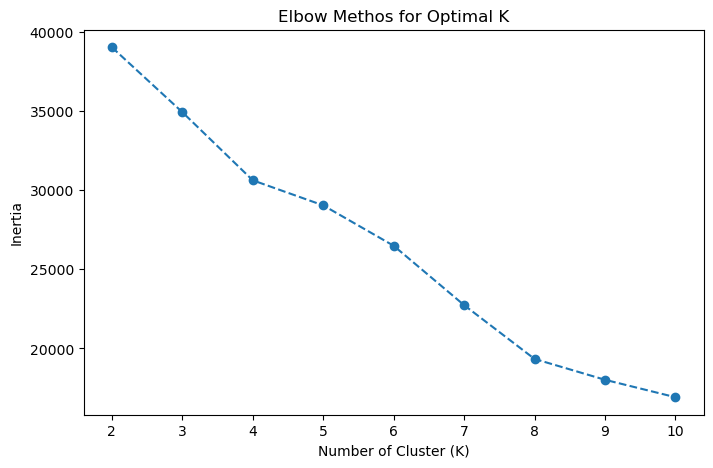

In [11]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia , marker='o', linestyle = '--')
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Methos for Optimal K")
plt.show()

In [12]:
# Fit K-Means with optimal K (assuming 4 from the elbow method)
kmeans = KMeans(n_clusters = 4, random_state = 42)
df_numeric['KMeans_Clusters'] = kmeans.fit_predict(df_scaled)

In [13]:
# Evaluate K-Means using Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, df_numeric['KMeans_Clusters'])
print(f'K-means Silhouette Score:{kmeans_silhouette:.2f}')

K-means Silhouette Score:0.23


In [14]:
# ==============================
# HIERARCHICAL CLUSTERING
# ==============================

In [15]:
# Create a linkage matrix
linkage_metrics = linkage(df_scaled, method = 'ward')

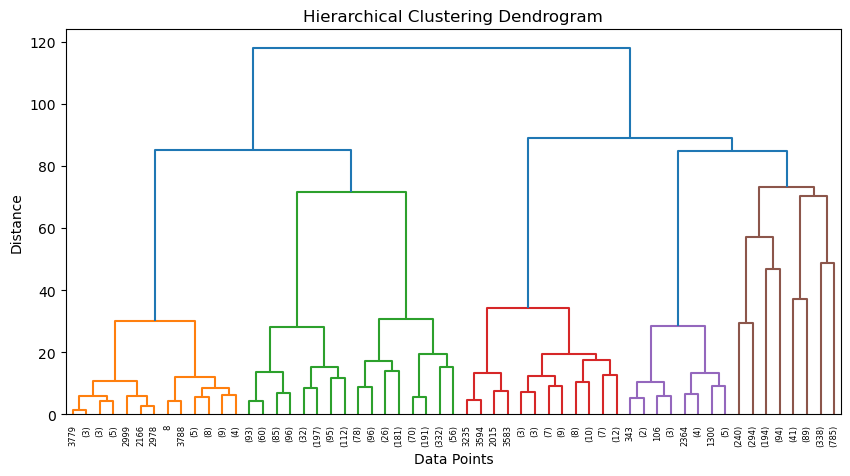

In [16]:
# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_metrics, truncate_mode = 'level', p = 5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [17]:
# Fit hierarchical clustering (Assuming 4 clusters from dendrogram)
df_numeric['Hierarchical_Cluster'] = fcluster(linkage_metrics, 4, criterion = 'maxclust')

In [18]:
# ==============================
# DBSCAN CLUSTERING
# ==============================

In [19]:
# Fit DBSCAN
dbscan = DBSCAN(eps = 1.2, min_samples = 5)
df_numeric['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [20]:
# Evaluate DBSCAN using Silhouette Score (Ignore noise points) 
dbscan_labels = df_numeric['DBSCAN_Cluster']
if len(set(dbscan_labels)) > 1:      # Silhouette is valid only if multiple clusters exist 
    dbscan_silhouette = silhouette_score(df_scaled , dbscan_labels)
    print(f'DBSCAN Silhouette Score :{dbscan_silhouette :.2f}')
else:
    print("DBSCAN Produced only onr Cluster, silhouette score id Not Applicable.")

DBSCAN Silhouette Score :0.17


In [21]:
# ==============================
# VISUALIZATION OF CLUSTERS
# ==============================

In [22]:
plt.figure(figsize=(15 , 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering')

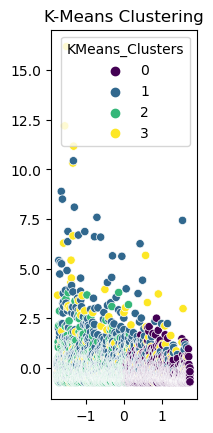

In [23]:
# K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue = df_numeric['KMeans_Clusters'], palette = 'viridis')
plt.title('K-Means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

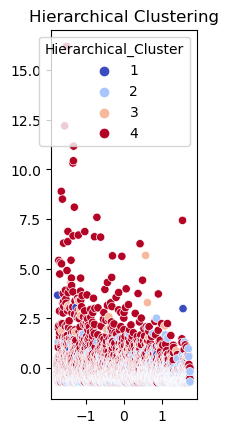

In [24]:
# Hierarchical Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_scaled[:,0], y = df_scaled[:,1], hue = df_numeric['Hierarchical_Cluster'], palette = 'coolwarm')
plt.title("Hierarchical Clustering")

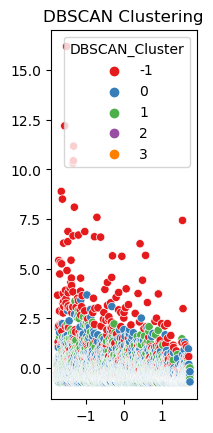

In [25]:
# DBSCAN Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue = df_numeric['DBSCAN_Cluster'] , palette = 'Set1')
plt.title("DBSCAN Clustering")
plt.show()